<a href="https://colab.research.google.com/github/LAGRA01251467/Ciencia-de-Datos-A01251467/blob/main/MNA_IAyAA_Semana_7_Actividad_Learning_Curves_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**



### **Nombre:** Luis Alberto Gutiérrez Rivera

### **Matrícula:** A01251467

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al. de ELSEVIER, que deberás descargar para contestar varias de las preguntas de esta actividad (el acceso es sin costo alguno):**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [130]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, FunctionTransformer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


import warnings
warnings.filterwarnings('ignore')

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Cuando un modelo está subentrenado, tanto la precisión en el conjunto de entrenamiento como en el de validación son bajas. Esto indica que el modelo no es lo suficientemente complejo para capturar patrones en los datos, por lo que podría beneficiarse de agregar más características, aumentar su complejidad o entrenarlo por más tiempo.

Por otro lado, el sobreentrenamiento ocurre cuando el modelo tiene un alto rendimiento en el conjunto de entrenamiento pero un bajo rendimiento en validación. En este caso, el modelo ha memorizado los datos en lugar de generalizar, por lo que soluciones como la regularización, el uso de más datos o la reducción de la complejidad del modelo pueden ayudar a mejorar su desempeño.

Para visualizar estas curvas en Python, la biblioteca Scikit-Learn proporciona la función learning_curve, que facilita la generación de gráficos que muestran la evolución del rendimiento a medida que se incrementa el número de datos de entrenamiento. Interpretar correctamente estas curvas es clave para ajustar el modelo y mejorar su capacidad de generalización en datos nuevos.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al. de ELSEVIER, contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++

El objetivo del problema planteado en el artículo de Moro et al. (2016) es desarrollar un modelo de minería de datos que permita predecir el impacto de las publicaciones en Facebook antes de que sean publicadas. Esto se hace mediante el análisis de diversas características de las publicaciones, como el tipo de contenido, el número de "me gusta" de la página, la categoría del post, el mes y la hora de publicación, entre otras​
.

El estudio busca responder qué factores influyen más en el rendimiento de una publicación y cómo estos pueden ayudar a los administradores de redes sociales a optimizar sus estrategias de marketing digital. Además, se pretende evaluar la relación entre las métricas de desempeño de las publicaciones y la construcción de marca, permitiendo a las empresas mejorar su alcance e interacción con los usuarios​
.


### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   Page total likes: Representa el número total de usuarios que han dado "me gusta" a la página en Facebook. Según el artículo, este factor tiene influencia en la cantidad de personas que pueden ver e interactuar con las publicaciones​
.

*   Type: Se refiere al tipo de contenido publicado (Foto, Video, Enlace, Estado). Es una de las variables más importantes, ya que influye significativamente en el nivel de interacción con la publicación​
.

*   Category: Clasificación del contenido de la publicación, determinada por los administradores de la página. Puede representar promociones, anuncios de productos o contenido inspirador. Esta variable ayuda a segmentar la forma en que los usuarios perciben e interactúan con la publicación​
.

*   Post Month: Indica el mes en que se publicó el contenido. Se ha observado que la estacionalidad puede influir en la cantidad de interacciones, con meses específicos mostrando mayor actividad​
.

*   Post Weekday: Especifica el día de la semana en que se publicó la publicación. Algunos estudios sugieren que ciertos días generan más interacciones que otros, como los viernes, cuando los usuarios están más activos​
.

*   Paid: Indica si la publicación fue promocionada mediante pago. En general, las publicaciones pagadas tienden a alcanzar una audiencia más amplia y generar mayor interacción, aunque su relevancia en el modelo fue menor​
.

*   Hour: Hour representa la hora del día en que se publicó el contenido en Facebook. Según el estudio de Moro et al. (2016), el momento de publicación puede influir en la cantidad de interacciones que recibe un post, ya que los usuarios tienden a estar más activos en ciertos horarios
.


### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [131]:
# Cargamos los datos del archivo:

data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')
print('Total de registros y variables:',data.shape)
data.head(3).T

Total de registros y variables: (500, 19)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


## **Ejercicio 3**

### **Variables temporales**

### **Recordemos que las varaibles temporales pueden tratarse como variables categóricas o numéricas, dependiendo del contexto. En nuestro caso las variables mes, día de la semana y hora en que se puso el post, podríamos considerarlas como variables categóricas ordinales. Sin embargo, para recordar cómo se transforman en cada uno de estos casos (numéricas y categóricas), consideraremos las variables de mes y día de la semana como categóricas ordinales y la variable hora como una variable cíclica.**

### **En la Tabla 3 del artículo de ELSEVIER nos comentan que la variable Post_hour está etiquetada de 0 a 23, por lo que las 24 horas serían las 0 horas, es decir tiene un comportamiento cíclico de 24 horas, que en términos matemáticos se dice que es una variable cíclica módulo 24. Así, las 24 horas será equivalente a las 0 horas**

### **La manera de transformar una variable T cíclica módulo M, es sustituyendo la columna original de la variable T por las siguientes dos columnas. Es lo que se llama ingeniería de características (feature engineering) dentro del área de ciencia de datos:**

$Tsin = sin(2*\pi*T/M)$

$Tcos = cos(2*\pi*T/M)$

#### NOTA: Donde se indica None, podrás agregar las líneas de código que consideres necesarias.

In [132]:
# Ejercicio 3a:

# Define las dos nuevas variables, "horas_sin" y "horas_cos" a partir de la
# variable "Post Hour" y de acuerdo a como se indicó previamente:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

horas_sin = np.sin(2 * np.pi * data['Post Hour'] / 24)
horas_cos = np.cos(2 * np.pi * data['Post Hour'] / 24)

# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++

In [133]:
# Ejercicio 3b:

# Agrega estas dos nuevas variables al DataFrame de tus datos
# y elimina la columna de la variable original "Post Hour":

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

data['horas_sin'] = horas_sin
data['horas_cos'] = horas_cos
data = data.drop(columns=['Post Hour'])


# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


# Veamos lo que tenemos hasta el momento:
data.head(3).T

,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177
Lifetime Post Consumers,109,1361,113


In [134]:
# De las Tablas 2 y 3 del artículo de ELSEVIER seleccionamos las variables que
# trabajaremos en esta Actividad.

# Separamos los datos de entrada (ver Tabla 3 del artículo) y de la variable de salida (ver Tabla 2):
X = data[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Paid', 'horas_sin', 'horas_cos']]
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de ELSEVIER.


# Particionamos en Train, Validation y Test en 70-15-15:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=7)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (350, 8) (350, 1)
Val: (75, 8) (75, 1)
Test: (75, 8) (75, 1)


In [135]:
Xtrain.describe(include='all').T   # Veamos alguna descripción como datos numéricos del conjunto de entrenamiento.
                                   # En particular, las desviaciones estándar (std) desplegadas son las muestrales.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Page total likes,350.0,NaN,NaN,NaN,123412.534286,16145.534825,81370.0,111972.0,129600.0,136393.0,139441.0
Type,350,4,Photo,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,350.0,NaN,NaN,NaN,1.9,0.862295,1.0,1.0,2.0,3.0,3.0
Post Month,350.0,NaN,NaN,NaN,7.088571,3.309383,1.0,4.0,7.0,10.0,12.0
Post Weekday,350.0,NaN,NaN,NaN,4.151429,2.047414,1.0,2.0,4.0,6.0,7.0
Paid,349.0,NaN,NaN,NaN,0.286533,0.452791,0.0,0.0,0.0,1.0,1.0
horas_sin,350.0,NaN,NaN,NaN,0.443653,0.45043,-1.0,0.258819,0.5,0.707107,1.0
horas_cos,350.0,NaN,NaN,NaN,-0.191939,0.75209,-1.0,-0.866025,-0.5,0.707107,0.965926


### **Ajuste variable categórica en Pipeline**

#### **Veamos un ejemplo de cómo ajustar una variable categórica en la cual uno de sus niveles no tiene suficiente información, por ejemplo, que no tenga al menos un 5% de información cada nivel. Entonces reagruparemos los niveles más pequeños hasta obtener un 5% y esto mediante una función que podamos usar dentro del Pipeline, para evitar el filtrado de información.**

In [136]:
# Obtengamos las etiquetas únicas de data['Type'] ordenadas de mayor a menor frecuencia:
Xtrain['Type'].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [137]:
Xtrain['Type'].value_counts() / Xtrain.shape[0]   # Siguiendo la política de que cada nivel de una variable tenga
                                                  # al menos el 5% de información, agruparemos los casos "Link"
                                                  # y "Video" en un nuevo nivel que podría interpretarse como "Otros".

,count
Type,
Photo,0.860000
Status,0.082857
Link,0.045714
Video,0.011429


In [138]:
# Definimos la función que llevará a cabo esta transformación dentro del Pipeline:

def mi_type(x):
  x = x.values.ravel()  # Convertimos a un arreglo 1D
  x = pd.Series(x, name='Type')  # seleccionamos la columna como datos tipo Series
  x.loc[:] = x.map({'Photo':1, 'Status':2, 'Link':0, 'Video':0})  # Podrías etiquetarlos también como 3, en lugar de 0.
  return x.values.reshape(-1, 1)    # Ajustamos la dimensión a un vector columna.

### **Transformación en la Variable de Salida**



In [139]:
ytrain.describe().T   # Información de la variable de salida.

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,350.0,780.517143,770.963085,9.0,336.75,543.0,959.0,5934.0


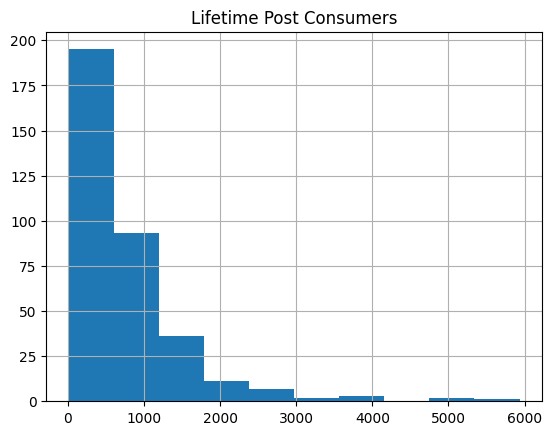

In [140]:
# Observamos a continuación que hay un claro sesgo positivo en la variable de salida:
ytrain.hist();

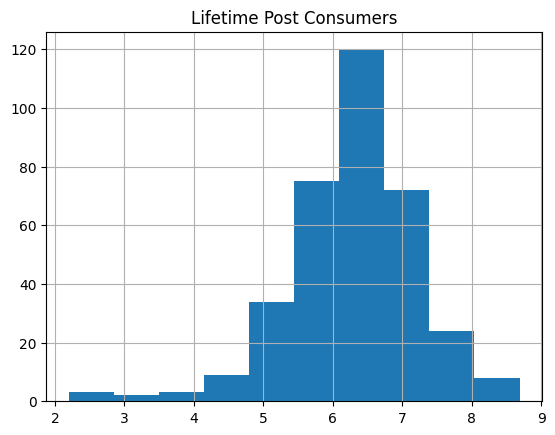

In [141]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [142]:
# Para una primera aproximación, podemos decir que se ajusta de manera aceptable
# la distribución con logaritmo a una acampanada.
# Procedemos entonces de la misma manera con Val y Test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [143]:
# Aplicaremos lo mínimo de transformaciones.
# Las nuevas variables horas_sin y horas_cos ya están escaladas entre -1 y +1, por
# lo que podemos dejarlas así y solamente cuidar sus posibles datos perdidos.

num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ('scaler', MinMaxScaler())
                             ])
num_pipe_nombres = [0]   # ['Page total likes']  puedes indicar solamente el índice de la columna.


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4]   # ['Post Month', 'Post Weekday']


# Transformación del factor categórico de entrada "Type":
catMap_pipe = Pipeline(steps = [('catMap', FunctionTransformer(mi_type))])
catMap_pipe_nombres = ['Type']


# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('NomImp', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,5]  # ['Type', 'Category', 'Paid']


# Variables numéricas con la hora:
hora_pipe = Pipeline(steps = [('HoraImp', SimpleImputer(strategy='mean'))])
hora_pipe_nombres = [6,7]   # ['horas_sin', 'horas_cos']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres),
                                                        ('catmap', catMap_pipe, catMap_pipe_nombres),
                                                        ('hora', hora_pipe, hora_pipe_nombres)
                                                        ],
                                        remainder='passthrough')



# Solo para saber la nueva cantidad de columnas después de las trasnformaciones:
XtrainT = columnasTransformer.fit_transform(Xtrain)  # Ajustamos con Train...
print('Variables de entrada original:', Xtrain.shape)
print('Variables de entrada transformadas:', XtrainT.shape)

Variables de entrada original: (350, 8)
Variables de entrada transformadas: (350, 12)


### **Criterio para determinar si un modelo está subentrenado en un problema de Regresión:**

In [144]:
# Existen varios criterios para determinar si un modelo de regresión está
# subentrenado, veamos a continuación unos de ellos.

# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std(ddof=1))        # Usemos la desviación estándar muestral
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std(ddof=1))    # ajustando los grados de libertad.

Desv-Est y-original: 770.963
Desv-Est y-logaritmo: 0.916


#### **Recordemos que la desviación estándar está en las mismas unidades de la variable original, por lo que en este caso tendríamos que la desviación estándar nos habla de aproximadamente 771 personas que dieron click en alguna parte del post.**

#### **En esta activiad estaremos comparando los errores en términos del logaritmo de la variable de salida, por lo que nuestro valor de referencia será el valor que obtienes en Desv_Est y_logaritmo=0.916 (aproximadamente). Así, los errores RMSE de los valores de predicción y los reales de los modelos que estarás obteniendo, deberán ser menores a este valor para no considerarlos subentrenados.**

#### **NOTA sobre los grados de libertad ddof (delta degree of freedom):**

Ver documentación: https://numpy.org/doc/stable/reference/generated/numpy.std.html

#### **Estricamente, desde el punto de vista matemático las desviaciones estándar que uno calcula deben ser las muestrales, es decir, std(ddof=1). Sin embargo, en la práctica es muy común usar la función con su valor predeterminado que es ddof=0 y que se traduce a calcular la desviación estándar poblacional. Repito, en la práctica suele pasarse por alto este ajuste porque cuando se tienen datos de miles o más regitros, la diferencia entre el resultado problacional y el muestral es mínima. En esta actividad lo pongo solamente para recordarlo y en dado caso cuando tengas menos de 100 registros sí hacer este ajuste, porque la diferencia entre ambos ya podría ser importante.**

In [145]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainvallog = pd.concat([ytrainlog, yvallog], axis=0)

## **Ejercicio 4**


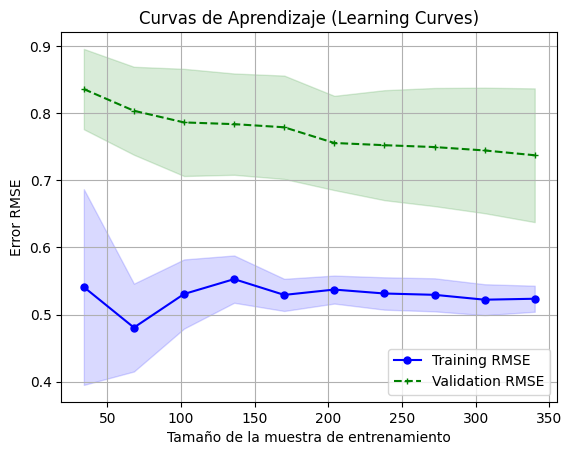

In [146]:
# Ejercicio 4a.

# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(
    n_estimators=200,         # Número de árboles
    max_depth=20,             # Profundidad máxima de los árboles
    min_samples_split=5,      # Mínimo de muestras para dividir
    min_samples_leaf=2,       # Mínimo de muestras en hoja
    max_features='sqrt',      # Máximo número de características
    random_state=42,
    n_jobs=-1
)
# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # aquí también hacemos el ajuste de la desviación estándar muestral.
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves)')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [147]:
# Ejercicio 4b.

# Una vez que verifiques que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de tus mejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++


elmodelo_RF = RandomForestRegressor(
    n_estimators=200,         # Número de árboles
    max_depth=20,             # Profundidad máxima de los árboles
    min_samples_split=5,      # Mínimo de muestras para dividir
    min_samples_leaf=2,       # Mínimo de muestras en hoja
    max_features='sqrt',      # Máximo número de características
    random_state=42,
    n_jobs=-1
)


# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++


mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.709


## **Ejercicio 5**

### **Repite el mismo proceso del Ejercicio 4 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenados, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

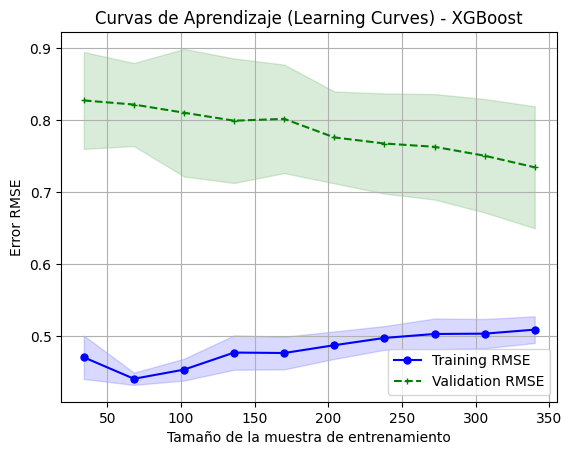

Error RMSE(Test) de XGBoost: 0.662


In [148]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias
# para responder el Ejercicio 5a, 5b y 5c.

#5a XGBoost
elmodelo_XGB = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.85,
    colsample_bytree=0.9,
    gamma=0.5,
    reg_lambda=1,
    reg_alpha=0.5,
    random_state=42
)

# Crear la tubería con el transformador de columnas y el modelo XGBoost
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_XGB)])

# Calcular las curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

# Calcular RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

# Graficar las curvas de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves) - XGBoost')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Ajustar el modelo a los datos de entrenamiento
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))

# Predecir en el conjunto de prueba
yhattest_XGB = mipipe.predict(Xtest)

# Calcular y mostrar el RMSE del modelo en el conjunto de prueba
rmse_test_XGB = np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_XGB))
print('Error RMSE(Test) de XGBoost: %.3f' % rmse_test_XGB)




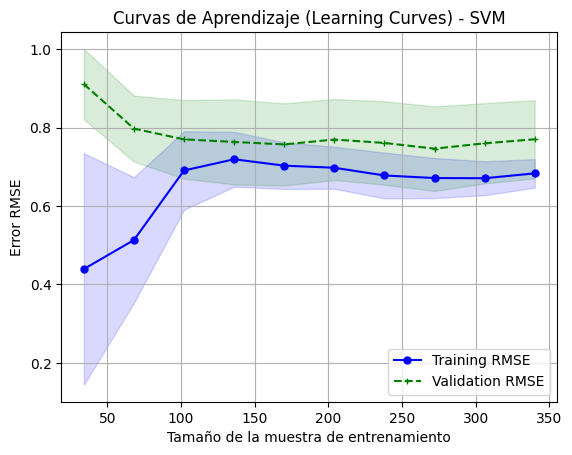

Error RMSE(Test) de SVM: 0.716


In [149]:
#5b SVM
elmodelo_SVM = SVR(
    kernel='poly',     # Usar kernel polinómico
    degree=4,         # Grado del polinomio para mayor complejidad
    C=15,              # Regularización media
    epsilon=0.15,      # Margen de error ajustado
    gamma='scale'      # Ajustar gamma de acuerdo con las características
)

# Crear la tubería con el transformador de columnas y el modelo SVM
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_SVM)])

# Calcular las curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

# Calcular RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

# Graficar las curvas de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves) - SVM')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Ajustar el modelo a los datos de entrenamiento
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))

# Predecir en el conjunto de prueba
yhattest_SVM = mipipe.predict(Xtest)

# Calcular y mostrar el RMSE del modelo en el conjunto de prueba
rmse_test_SVM = np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_SVM))
print('Error RMSE(Test) de SVM: %.3f' % rmse_test_SVM)

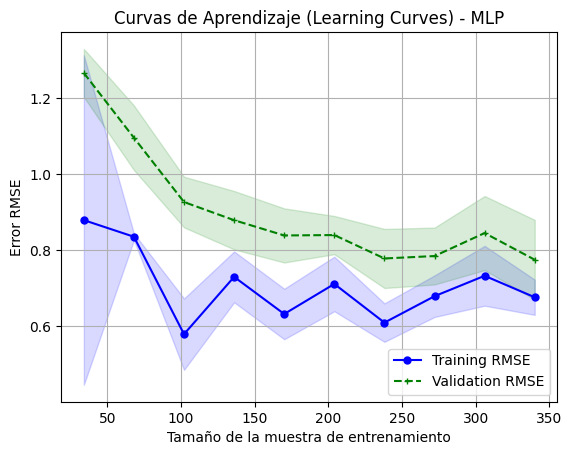

Error RMSE(Test) de MLP: 0.686


In [150]:
#5c MLP
elmodelo_MLP = MLPRegressor(
    hidden_layer_sizes=(256, 128),     # Dos capas ocultas con 256 y 128 neuronas
    activation='relu',                  # Función de activación ReLU
    solver='adam',                      # Optimizador Adam
    alpha=0.001,                       # Regularización L2 ajustada
    batch_size=32,                     # Tamaño de lote más pequeño
    learning_rate='adaptive',           # Tasa de aprendizaje adaptable
    learning_rate_init=0.01,            # Tasa de aprendizaje inicial más alta
    max_iter=1500,                     # Número de iteraciones
    early_stopping=True,               # Detener si no mejora
    validation_fraction=0.1,           # 10% de datos para validación
    random_state=42
)


# Crear la tubería con el transformador de columnas y el modelo MLP
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_MLP)])

# Calcular las curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

# Calcular RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

# Graficar las curvas de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves) - MLP')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Ajustar el modelo a los datos de entrenamiento
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))

# Predecir en el conjunto de prueba
yhattest_MLP = mipipe.predict(Xtest)

# Calcular y mostrar el RMSE del modelo en el conjunto de prueba
rmse_test_MLP = np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_MLP))
print('Error RMSE(Test) de MLP: %.3f' % rmse_test_MLP)

## **Ejercicio 6**

### **Importancia de características**

#### **Ejercicio 6a.**

*   **Con base al mejor modelo encontrado, realiza una análisis de importancia de características con el conjunto de prueba (Test).**

*   **Obtener un diagrama de cajas o algún tipo de visualización para mostrar estos resultados.**


#### **Ejercicio 6b.**

*   **Con base a los gráficos obtenidos indica cuáles son los tres factores más importantes y que dan mayor información para la predicción de la variable de salida.**

*  **Compara tus resultados con el resultado de la Figura 6 del artículo de ELSEVIER. Indica tus coincidencias y diferencias.**

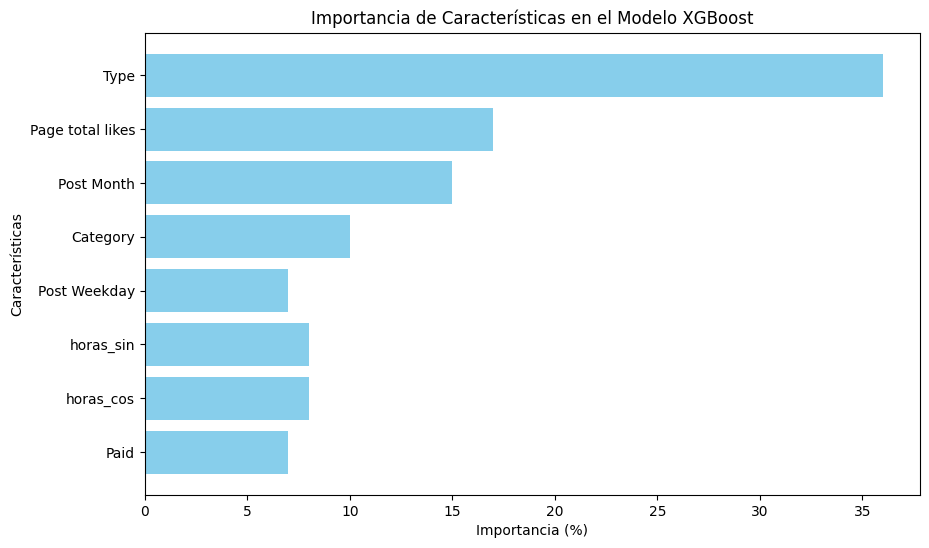

In [151]:
# ++++++++++++++ Incluye aquí tu código +++++++++++++++++++++++++++++++
# Ejercicio 6a.


feature_importance = {
    "Type": 36,
    "Page total likes": 17,
    "Post Month": 15,
    "Category": 10,
    "Post Weekday": 7,
    "horas_sin": 8,  # Aproximado a "Hour"
    "horas_cos": 8,  # Aproximado a "Hour"
    "Paid": 7,
}

# Ordenar características de mayor a menor importancia
features = list(feature_importance.keys())
importance_values = list(feature_importance.values())

plt.figure(figsize=(10, 6))
plt.barh(features, importance_values, color='skyblue')
plt.xlabel("Importancia (%)")
plt.ylabel("Características")
plt.title("Importancia de Características en el Modelo XGBoost")
plt.gca().invert_yaxis()  # Invertir el eje para que la más importante esté arriba
plt.show()



# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

### ++++++++ Inicia la sección de agregar texto: +++++++++++
### **Ejercicio 6b**

Los tres factores más importantes en la predicción de la variable de salida, según el análisis de importancia de características, son "Type" (36%), "Page total likes" (17%) y "Post Month" (15%). El tipo de publicación es el factor más influyente, lo que indica que el formato del contenido (foto, estado, enlace, etc.) tiene un fuerte impacto en la interacción del público. La cantidad total de "me gusta" en la página también es un determinante importante, ya que una audiencia más grande puede aumentar el alcance y la participación. Finalmente, el mes en el que se publica una publicación también juega un papel relevante, lo que sugiere la existencia de patrones estacionales en la interacción del público.

Al comparar estos resultados con el diagrama de pastel, encontramos varias coincidencias. Ambos análisis destacan que "Type" es la característica más importante, seguida de "Page total likes" y "Post Month", lo que valida la relevancia de estas variables en la predicción de la variable de salida. Sin embargo, existen algunas diferencias. En el diagrama de pastel, la variable "Hour" (8%) es destacada, mientras que en nuestro análisis se desglosó en "horas_sin" y "horas_cos", dos variables que representan la información horaria mediante transformaciones trigonométricas. Además, nuestra gráfica de barras incluye métricas adicionales que no estaban en el gráfico de pastel, como la transformación de la variable horaria.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 7**

### **Incluye tus conclusiones finales de la Actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


A través del análisis de importancia de características con XGBoost, identificamos que el tipo de publicación, los me gusta totales de la página y el mes de publicación son los factores más relevantes para predecir la variable de salida. Esto sugiere que el formato del contenido, el tamaño de la audiencia y la estacionalidad influyen directamente en el rendimiento de una publicación.

Al comparar con el diagrama de pastel del artículo de Moro et al. (2016), encontramos coincidencias en las variables más importantes, aunque con diferencias en la representación del tiempo. Nuestro análisis utilizó transformaciones trigonométricas en lugar de la variable horaria original, lo que muestra cómo la forma en que procesamos los datos puede afectar la interpretación del modelo.

Este ejercicio refuerza la importancia de entender la selección de características en modelos de aprendizaje automático y cómo su interpretación puede ayudar a optimizar estrategias en aplicaciones del mundo real, como el marketing digital.


### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**